In [1]:
import os
import json
import gzip
import pandas as pd
import numpy as np
import cv2
from urllib.request import urlopen
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import urllib
import cv2
from io import BytesIO
from PIL import Image
from os import path

In [2]:
# Đây là bộ dataset gồm 9.4 triệu sản phẩm 
# !wget http://snap.stanford.edu/data/amazon/productGraph/metadata.json.gz

# **Part I** Load data và lọc lấy 1 phần nhỏ data

In [3]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Clothing_Shoes_and_Jewelry.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Health_and_Personal_Care.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Camera_and_Photo.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Baby.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Home_Improvement.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Patio_Lawn_and_Garden.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Pet_Supplies.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Home_and_Kitchen.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Arts_Crafts_and_Sewing.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Kitchen_and_Dining.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Automotive.json.gz
# Jewelry
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Grocery_and_Gourmet_Food.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Musical_Instruments.json.gz
# Watches
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Beauty.json.gz
# Shoes
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Electronics.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Computers.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Cell_Phones_and_Accessories.json.gz

--2022-10-05 10:59:42--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Clothing_Shoes_and_Jewelry.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280989093 (268M) [application/x-gzip]
Saving to: ‘meta_Clothing_Shoes_and_Jewelry.json.gz’

meta_Clothing_Shoes 100%[===================>] 267.97M  51.5MB/s    in 6.2s    

2022-10-05 10:59:48 (43.4 MB/s) - ‘meta_Clothing_Shoes_and_Jewelry.json.gz’ saved [280989093/280989093]

--2022-10-05 10:59:49--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Health_and_Personal_Care.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117874283 (112M) [application/x-gzip]
Saving to: ‘meta_Health_

In [4]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
        if i == 10000: break
    return pd.DataFrame.from_dict(df, orient='index')

In [5]:
df_1 = getDF('meta_Health_and_Personal_Care.json.gz')
df_2 = getDF('meta_Camera_and_Photo.json.gz')
df_3 = getDF('meta_Baby.json.gz')
df_4 = getDF('meta_Home_Improvement.json.gz')
df_5 = getDF('meta_Patio_Lawn_and_Garden.json.gz')
df_6 = getDF('meta_Pet_Supplies.json.gz')
df_7 = getDF('meta_Home_and_Kitchen.json.gz')
df_8 = getDF('meta_Arts_Crafts_and_Sewing.json.gz')
df_9 = getDF('meta_Kitchen_and_Dining.json.gz')
df_10 = getDF('meta_Automotive.json.gz')
df_11 = getDF('meta_Grocery_and_Gourmet_Food.json.gz')
df_12 = getDF('meta_Musical_Instruments.json.gz')
df_13 = getDF('meta_Beauty.json.gz')
df_14 = getDF('meta_Electronics.json.gz')
df_15 = getDF('meta_Computers.json.gz')
df_16 = getDF('meta_Cell_Phones_and_Accessories.json.gz')
df_17 = getDF('meta_Clothing_Shoes_and_Jewelry.json.gz')

In [6]:
# Gán lại giá trị categories cho đồng bộ
df_1.categories = 'Health & Personal Care'
df_2.categories = 'Camera & Photo'
df_3.categories = 'Baby'
df_4.categories = 'Home Improvement'
df_5.categories = 'Patio, Lawn & Garden'
df_6.categories = 'Pet Supplies'
df_7.categories = 'Home & Kitchen'
df_8.categories = 'Arts, Crafts & Sewing'
df_9.categories = 'Kitchen & Dining'
df_10.categories = 'Automotive'
df_11.categories = 'Grocery & Gourmet Food'
df_12.categories = 'Musical Instruments'
df_13.categories = 'Beauty'
df_14.categories = 'Electronics'
df_15.categories = 'Computers'
df_16.categories = 'Cell Phones & Accessories'

# Data cần lọc lại 1 lần nữa
raw_data_1 = pd.concat([df_1,df_2,df_5,df_7,df_8,
                      df_11,df_12,df_13,df_14,df_17])

# Gán lại giá trị categories cho đồng bộ
raw_data_2 = pd.concat([df_3,df_4,df_6,df_9,df_10,df_15,df_16])[['categories', 'imUrl','price','asin','description','title']]

In [7]:
df_16

,asin,related,title,price,salesRank,imUrl,brand,categories,description
0,0110400550,"{'also_bought': ['B00C56IXFG', 'B008ZUQWOK', '...",Pink &amp; White 3d Melt Ice-cream Skin Hard C...,3.33,{'Cell Phones & Accessories': 83460},http://ecx.images-amazon.com/images/I/31zn6SOL...,,Cell Phones & Accessories,Pink & White 3D Melt Ice-Cream Skin Hard Case ...
1,011040047X,"{'buy_after_viewing': ['B008RU7UL2', 'B00698LY...",Purple Hard Case Cover for Iphone 4 4s 4g with...,1.94,{'Cell Phones & Accessories': 495795},http://ecx.images-amazon.com/images/I/41WCZc2d...,NaN,Cell Phones & Accessories,Purple Hard Case Cover for iPhone 4 4S 4G With...
2,0195866479,"{'buy_after_viewing': ['B00530RXP2', 'B004SH9B...",Hello Kitty Light-weighted Chrome Case Black C...,2.94,{'Cell Phones & Accessories': 371302},http://ecx.images-amazon.com/images/I/41fy1%2B...,NaN,Cell Phones & Accessories,"Thin and light weighted,\nCase's unique design..."
3,0214514706,"{'buy_after_viewing': ['B0042FV2SI', 'B00869D2...",Cool Summer Breeze in the Ocean Beach Collecti...,0.94,{'Cell Phones & Accessories': 778100},http://ecx.images-amazon.com/images/I/415cmp6Q...,NaN,Cell Phones & Accessories,Product Name: Cool Summer Breeze In The Ocean...
4,0214714705,"{'buy_after_viewing': ['B008EU7HRM', 'B00869D2...",Cool Summer Breeze In The Ocean Beach Collecti...,5.79,{'Cell Phones & Accessories': 654894},http://ecx.images-amazon.com/images/I/41XDwPt2...,NaN,Cell Phones & Accessories,Product Name: Cool Summer Breeze In The Ocean...
...,...,...,...,...,...,...,...,...,...
9995,B000TJT47W,NaN,Incipio Executive Molded-Leather Hard Case for...,NaN,{'Cell Phones & Accessories': 2113577},http://ecx.images-amazon.com/images/I/418KN%2B...,NaN,Cell Phones & Accessories,A protective case that fits like a glove. Mold...
9996,B000TJP5HK,NaN,Motorola V235 V323 V325 V360 V361 V365 W315 Ca...,3.99,{'Cell Phones & Accessories': 774627},http://ecx.images-amazon.com/images/I/31WHF52f...,NaN,Cell Phones & Accessories,Generic Mini USB Car Charger
9997,B000TJXFS6,"{'buy_after_viewing': ['B003T4D5Y2', 'B00851AO...",iGRIP Universal Traveler Kit,22.23,{'Cell Phones & Accessories': 231357},http://ecx.images-amazon.com/images/I/51vBMhYn...,iGrip,Cell Phones & Accessories,Keep your hands on the Wheel and eyes on the R...
9998,B000TK3V2U,NaN,BauBau iPhone Case Pouch,NaN,NaN,http://ecx.images-amazon.com/images/I/41cQqsxM...,NaN,Cell Phones & Accessories,NaN


In [8]:
def replace(text):
    if 'Health & Personal Care' in text:
        text = 'Health & Personal Care'
    if 'Camera &amp; Photo' in text:
        text = 'Camera & Photo'
    if 'Patio, Lawn & Garden' in text:
        text = 'Patio, Lawn & Garden'
    if 'Home &amp; Kitchen' in text:
        text = 'Home &amp; Kitchen'
    if 'Arts, Crafts & Sewing' in text:
        text = 'Arts, Crafts & Sewing'  
    if 'Grocery & Gourmet Food' in text:
        text = 'Grocery & Gourmet Food' 
    if 'Musical Instruments' in text:
        text = 'Musical Instruments'
    if 'Beauty' in text:
        text = 'Beauty'
    if 'Electronics' in text:
        text = 'Electronics'
    if 'Cell Phones & Accessories' in text:
        text = 'Cell Phones & Accessories'
    if 'Clothing' in text:
        text = 'Clothing'
    if 'Shoes' in text:
        text = 'Shoes'
    if 'Jewelry' in text:
        text = 'Jewelry'
    if 'Watches' in text:
        text = 'Watches'
    return text

In [9]:
df_test = raw_data_1.copy()
df_test[['salesRank']].sample(10)

,salesRank
5695,{'Musical Instruments': 75715}
9605,{'Grocery & Gourmet Food': 115095}
6114,NaN
7125,"{'Patio, Lawn & Garden': 615295}"
1450,"{'Patio, Lawn & Garden': 312870}"
1602,{'Music': 385010}
5220,"{'Arts, Crafts & Sewing': 60652}"
6229,{'Musical Instruments': 1642}
8703,{'Health & Personal Care': 63103}
5171,{'Health & Personal Care': 260523}


In [10]:
df_test['salesRank'] = df_test['salesRank'].apply(lambda x: replace(str(x)))
df_test['salesRank'].value_counts().head(20)

nan                                 13070
Health & Personal Care               8936
Beauty                               8468
Grocery & Gourmet Food               8342
Patio, Lawn & Garden                 8313
Arts, Crafts & Sewing                5808
Musical Instruments                  4877
Home &amp; Kitchen                   3980
Clothing                             3787
Jewelry                              2783
Electronics                          1487
Camera & Photo                       1316
Watches                              1162
Shoes                                 840
{}                                    722
Cell Phones & Accessories             302
{'Sports &amp; Outdoors': 90}          10
{'Sports &amp; Outdoors': 1757}         8
{'Sports &amp; Outdoors': 8779}         7
{'Sports &amp; Outdoors': 45397}        7
Name: salesRank, dtype: int64

In [11]:
df1 = df_test.loc[df_test.salesRank == 'Health & Personal Care']
df2 = df_test.loc[df_test.salesRank == 'Beauty']
df3 = df_test.loc[df_test.salesRank == 'Grocery & Gourmet Food']
df4 = df_test.loc[df_test.salesRank == 'Patio, Lawn & Garden']
df5 = df_test.loc[df_test.salesRank == 'Arts, Crafts & Sewing']
df6 = df_test.loc[df_test.salesRank == 'Musical Instruments']
df7 = df_test.loc[df_test.salesRank == 'Home &amp; Kitchen']
df8 = df_test.loc[df_test.salesRank == 'Clothing']
df9 = df_test.loc[df_test.salesRank == 'Jewelry']
df10 = df_test.loc[df_test.salesRank == 'Electronics']
df11 = df_test.loc[df_test.salesRank == 'Camera & Photo']
df12 = df_test.loc[df_test.salesRank == 'Watches']
df13 = df_test.loc[df_test.salesRank == 'Shoes']

# Tiến hành xóa bỏ các cột dư thừa
df1=df1.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df2=df2.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df3=df3.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df4=df4.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df5=df5.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df6=df6.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df7=df7.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df8=df8.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df9=df9.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df10=df10.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df11=df11.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df12=df12.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})
df13=df13.reset_index(drop = True)[['imUrl','salesRank','price','asin','description','title']].rename(columns={"salesRank": "categories"})

In [12]:
# Tập hợp data gồm 20 categories đã qua xử lí lại
data = pd.concat([raw_data_2,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13])
data = data.reset_index(drop = True)
print("Data Dimensions are: ", data.shape)
print("Columns: ", data.columns)

Data Dimensions are:  (112244, 6)
Columns:  Index(['categories', 'imUrl', 'price', 'asin', 'description', 'title'], dtype='object')


In [13]:
data.dropna(subset=['categories', 'imUrl'], axis=0, inplace=True)
print(f'Dataset size: {len(data)}')
data.sample(10)

Dataset size: 111631


,categories,imUrl,price,asin,description,title
76546,Grocery & Gourmet Food,http://ecx.images-amazon.com/images/I/31L-McAf...,6.99,B0008DI8QM,"Softer caramel, wonderful for centers, apple d...",Mercken's Block Vanilla Caramel
92199,Musical Instruments,http://ecx.images-amazon.com/images/I/414NKFSM...,49.95,B00006HMQ6,Take your talents to another level or embark u...,Casio LK-43 Lighted Keyboard
477,Baby,http://ecx.images-amazon.com/images/I/41Ag8SwJ...,7.48,B00005BYUL,"Sassy baby Large, Medium and Small Feeding Bow...","Sassy Baby Large, Medium, And Small Feeding Bo..."
52087,Cell Phones & Accessories,http://ecx.images-amazon.com/images/I/516QyZ7J...,5.77,B000TA8F80,"Features: long lasting high grade cow leather,...",Cellet Motorola RAZR V3 &quot;Posh Case&quot; ...
111690,Shoes,http://ecx.images-amazon.com/images/I/41YCSEcm...,NaN,B0001HMC7Q,NaN,Men's LaCrosse&reg; 18&quot; Alphaburly Huntin...
50330,Cell Phones & Accessories,http://ecx.images-amazon.com/images/I/41OuuZNL...,11.15,B000NUTPLW,Cellet Omega Case Series provide excellent pro...,Cellet Horizontal Omega Pouch for HD2 &amp; EV...
58770,Health & Personal Care,http://ecx.images-amazon.com/images/I/41Mte2BW...,17.56,B00028OIKI,Bluebonnet Nutrition Lycopene 20 mg - 30 Softg...,Bluebonnet Nutrition - Lycopene 20 mg. - 30 So...
59462,Health & Personal Care,http://ecx.images-amazon.com/images/I/41k78lNN...,18.99,B0002DUN4I,"multi+ complete, the unique food-based high-po...",Genuine Health: multi+ complete (60Tablets)
2659,Baby,http://ecx.images-amazon.com/images/I/51IL1ZSC...,NaN,B000A1AF8G,"This kit includes a revised user guide, belt-r...","Britax Regent Youth Car Seat, Sahara"
26977,Kitchen & Dining,http://ecx.images-amazon.com/images/I/41xXoqj9...,17.99,B005IHCGJ8,"Good quality cigarette holder with integrated,...",Denicotea 20202 Ejector Lady Black and Gold Ho...


In [14]:
# Vì link ảnh có đuôi gif không thể truy cập nên ta tiến hành loại bỏ những dòng data có chứa link kiểu như vậy
def remove_imurl(string):
    if ".gif" in str(string):
        return None
    elif str(string) == np.nan:
        return None
    else:
        return string

data['imUrl'] = data['imUrl'].apply(lambda x: remove_imurl(x))
data = data.dropna(subset=['categories', 'imUrl'])

data = data.reset_index().drop('index',axis=1) 
print(f'Dataset size: {len(data)}')
data.sample(5)

Dataset size: 109279


,categories,imUrl,price,asin,description,title
37629,Computers,http://ecx.images-amazon.com/images/I/41YQQ9S3...,NaN,B001PIB9XI,Your Cable Store is the only authorized seller...,Your Cable Store Yellow USB Female A To USB Fe...
97355,Home &amp; Kitchen,http://ecx.images-amazon.com/images/I/41qLUVfL...,14.95,B000PHM2JA,Looking for the perfect way to add to your wes...,"2&quot; Hat Favors, Tan"
37181,Computers,http://ecx.images-amazon.com/images/I/51g0SmjX...,20.90,B00101XJDI,Mac Network Adapter / 802.11g Compatible / Jus...,Apple MA688Z/B Airport Extreme Wireless Upgrad...
103666,Jewelry,http://ecx.images-amazon.com/images/I/31XTAZeB...,NaN,B0002FQCI2,NaN,Sterling Silver Two-Tone Gold TWISTED Hoop Ear...
105181,Electronics,http://ecx.images-amazon.com/images/I/4184SSV9...,NaN,B00002EQBT,"The JBL S310 is a 3-way, 10-inch floor-standin...",JBL S310 3-Way Floorstanding Speaker (Single S...


In [15]:
# Xóa các link ảnh bị trùng lặp 
data.drop_duplicates(subset=['imUrl'],inplace=True) #dropping duplicates
print(f'Dataset size: {len(data)}')
data.sample(5)

Dataset size: 103075


,categories,imUrl,price,asin,description,title
48870,Cell Phones & Accessories,http://ecx.images-amazon.com/images/I/416llniL...,289.00,B000P7LHE6,,Plantronics CS70N/HL10 Professional Wireless O...
48169,Cell Phones & Accessories,http://ecx.images-amazon.com/images/I/41YC3zoP...,NaN,B000NDTDL6,Featuring: made from 100% premium silicone whi...,Motorola SLVR L7 Purple Silicone Skin Case
95039,Home &amp; Kitchen,http://ecx.images-amazon.com/images/I/41vroC4S...,NaN,0740794124,Bill Wattersons Calvin and Hobbes may be the m...,CALVIN &amp; HOBBES ART - FIRST CALVIN &amp; H...
69196,Grocery & Gourmet Food,http://ecx.images-amazon.com/images/I/41lcYkut...,9.99,B0000TZHZ4,Szechuan House Of Tsang Spicy Stir Fry Sauce s...,"House of Tsang Szechuan Spicy Stir Fry Sauce, ..."
58673,Health & Personal Care,http://ecx.images-amazon.com/images/I/21ZBywRK...,NaN,B0002PF5DK,NaN,MAC Fine Point Lip Liner Nutty


## **Data Analysis**

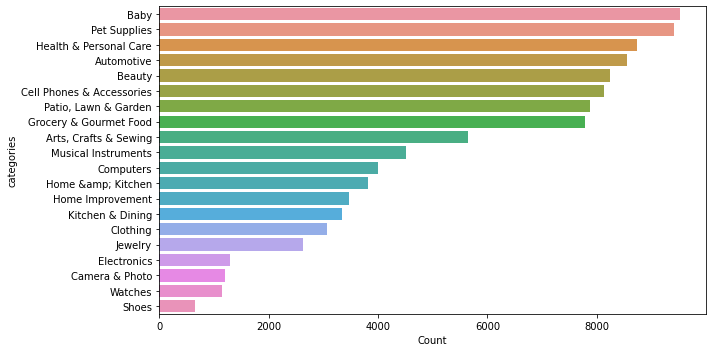

In [16]:
data_categories = data.groupby('categories')['imUrl'].count().reset_index().rename(columns={'imUrl': 'Count'})
data_categories = data_categories.sort_values(by='Count',ascending=False)

f, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=data_categories.head(20), y='categories', x='Count')
f.tight_layout()
plt.show()

In [17]:
categories = data['categories'].unique().tolist()
categories 

['Baby',
 'Home Improvement',
 'Pet Supplies',
 'Kitchen & Dining',
 'Automotive',
 'Computers',
 'Cell Phones & Accessories',
 'Health & Personal Care',
 'Beauty',
 'Grocery & Gourmet Food',
 'Patio, Lawn & Garden',
 'Arts, Crafts & Sewing',
 'Musical Instruments',
 'Home &amp; Kitchen',
 'Clothing',
 'Jewelry',
 'Electronics',
 'Camera & Photo',
 'Watches',
 'Shoes']

In [18]:
# Lấy 250 ảnh cho mỗi categories 
df = data.loc[data['categories']==categories[0]].sample(250)
for i in range(1,len(categories)):
    df = pd.concat([df, data.loc[data['categories']==categories[i]].sample(250)])

df = df.reset_index().drop('index',axis=1)
print(f'Dataset size: {len(df)}')
df.sample(3)

Dataset size: 5000


,categories,imUrl,price,asin,description,title
397,Home Improvement,http://ecx.images-amazon.com/images/I/41uaiqb2...,15.75,B004LNVYYS,NaN,Stainless Steel Wallet - Steel Yourself Agains...
3584,Clothing,http://ecx.images-amazon.com/images/I/41J5H5XD...,719.00,B00013VM7G,NaN,The Town Marshall 1&quot; Buckleset 071-325-5
2128,Beauty,http://ecx.images-amazon.com/images/I/21344WN7...,12.00,B0001IPZ6A,"Aquamarine means ""sea water"" and both the gems...",Aquamarine


In [19]:
df.to_csv('data_amazon_small.csv')

# **Part II**: Tiến hành chuyển ảnh sang dạng arrays và lưu lại

**Gồm 2 file: 1 file lưu giá trị label, 1 file là array ảnh**

## **Display image the actual image**

In [20]:
def display_img(url):
    """
    This functions takes the image url and return the picture of the image
    """
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
    plt.show()

Musical Instruments


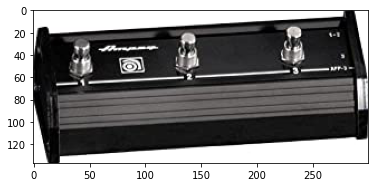

Musical Instruments


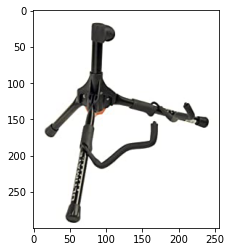

Musical Instruments


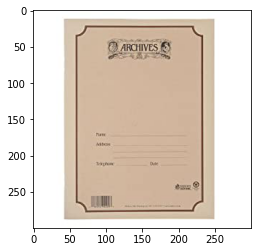

Musical Instruments


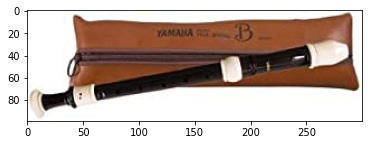

Musical Instruments


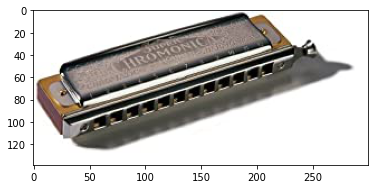

In [21]:
for i in range(3000,3005):
    print(df['categories'][i])
    display_img(df['imUrl'][i])

In [22]:
def img_array(img):   
    """
    This function takes in an image and converts the image to an array after resizing
  
    """
    response = urllib.request.urlopen(img)
    image = np.asarray(bytearray(response.read()), dtype="uint8") 
    image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image_bgr = cv2.resize(image_bgr, (224,224)) # resizing all images to one size 
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    return image_rgb

In [23]:
# Converting the response variable into numbers
for i in range(0,len(categories)):
    df['categories'][df['categories']== categories[i]]= i
    
df['categories']=df['categories'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
label = np.array(df['categories'])
list_img = list(df['imUrl'])

image_array=[]
label_array=[]
for i in range(0,6000):
    try: 
        if i in range(1000,7000,1000):
            print("sucessful:"+ str(i))
        image_array.append(img_array(list_img[i]))
        label_array.append(label[i])
        
    except:
        continue
        
label_array=np.array(label_array)
image_array=np.array(image_array)

sucessful:1000
sucessful:2000
sucessful:3000
sucessful:4000
sucessful:5000


In [25]:
np.save('label_array',label_array)
np.save('image_array',image_array)